## Titanic Dataset - Using Logistic Regression Model

Kaggle, a website with a set of Data Science problems and competitions hosted by multiple mega-technological companies like Google. Over the world, Kaggle is known for its problems being interesting, challenging and very, very addictive. One of these problems is the Titanic Dataset.

So summing it up, the Titanic Problem is based on the sinking of the ‘Unsinkable’ ship Titanic in the early 1912. It gives you information about multiple people like their ages, sexes, sibling counts, embarkment points and whether or not they survived the disaster. 

Based on these features, you have to **predict if an arbitrary passenger on Titanic would survive the sinking.**

In [1]:
# Importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Read the dataset
data = pd.read_csv('train.csv')

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Missing values and their imputation

In [6]:
round((data.isnull().sum()/len(data))*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

##### Comment:
- Cabin has 77% missing data hence it can be dropped
- PassengerID,Name and Ticket are the columns which have no value to the analysis, hence dropping them

In [7]:
data.drop(['Cabin','PassengerId','Name','Ticket'], axis = 1, inplace=True)

In [8]:
#Missing value percentage
round((data.isnull().sum()/len(data))*100,2)

Survived     0.00
Pclass       0.00
Sex          0.00
Age         19.87
SibSp        0.00
Parch        0.00
Fare         0.00
Embarked     0.22
dtype: float64

In [9]:
data['Age'].isna().sum()

177

<AxesSubplot:xlabel='Age', ylabel='Density'>

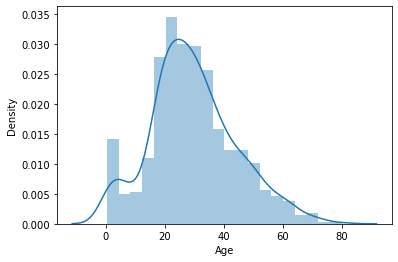

In [10]:
#Age distribution
sns.distplot(data['Age'])

Fill missing values with mean of the column

In [11]:
data['Age'].mean()

29.69911764705882

In [12]:
data['Age'].fillna(29.0, inplace=True)

In [13]:
data['Age'].isnull().sum()

0

In [14]:
data['Embarked'].isnull().sum()

2

In [15]:
data['Embarked'].mode() # Categorical column

0    S
dtype: object

In [16]:
data['Embarked'].fillna('S',inplace=True)

In [17]:
data['Embarked'].isnull().sum()

0

In [18]:
round((data.isnull().sum()/len(data))*100,2)

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
SibSp       0.0
Parch       0.0
Fare        0.0
Embarked    0.0
dtype: float64

All null values have been handled

#### Outlier Detection and treatment

In [127]:
data.describe((0.25,0.5,0.75,0.9,0.95))

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000,888.000000
mean,0.381757,2.313063,0.352477,29.540732,0.524775,0.381757,30.582164
std,0.486091,0.834007,0.478011,13.022614,1.104186,0.806949,41.176366
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.895800
50%,0.000000,3.000000,0.000000,29.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,30.771850
90%,1.000000,3.000000,1.000000,47.300000,1.000000,2.000000,76.896690
95%,1.000000,3.000000,1.000000,54.000000,3.000000,2.000000,110.883300
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,263.000000


There are few outliers in Age and Fare columns. Let's visualise them using boxplot

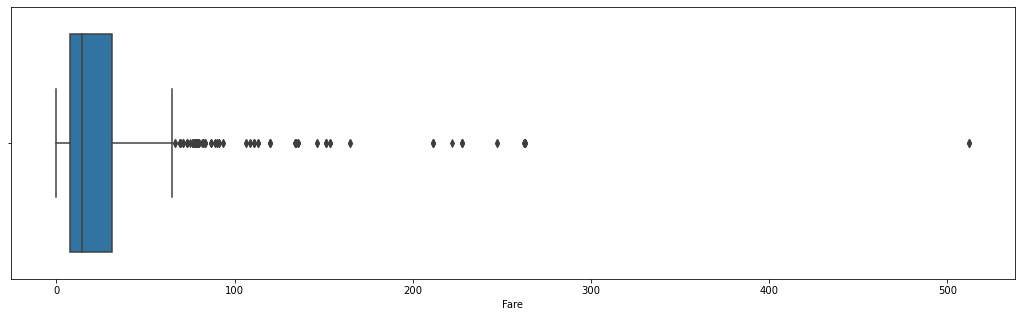

In [20]:
plt.figure(figsize = (18,5))
sns.boxplot(data['Fare']);

##### Comment:
There is one outlier in the **Fare** column. We can cap this outlier since its only one value

In [22]:
data.Fare.quantile(1)

512.3292

In [23]:
# Capping outlier value of the Fare column
data = data[data.Fare != 512.3292]

In [24]:
data.Fare.quantile(1)

263.0

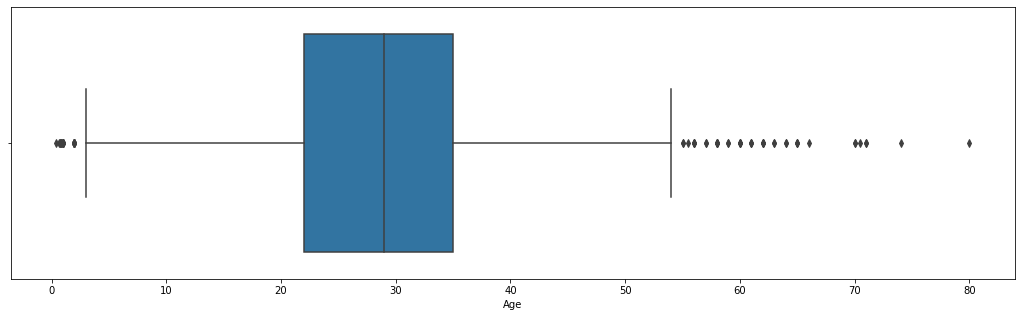

In [25]:
plt.figure(figsize = (18,5))
sns.boxplot(data.Age);

###### Comment:
Average Age of passengers is around 25. We can also see few passengers aged between 0-5 and 55-85

### Univariate analysis

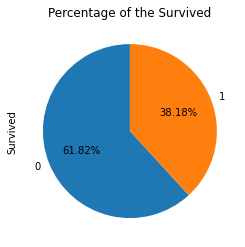

In [26]:
data.Survived.value_counts().plot.pie(autopct = '%1.2f%%', startangle = 90)
plt.title("Percentage of the Survived");

###### Comment:

About 62% of the travellers did not survive

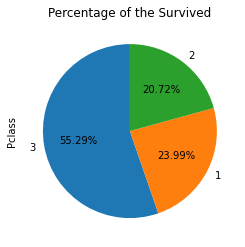

In [27]:
data.Pclass.value_counts().plot.pie(autopct = '%1.2f%%', startangle = 90)
plt.title("Percentage of the Survived");

###### Comment:
55% passengers travelled in Class 3

### Bivariate Analysis

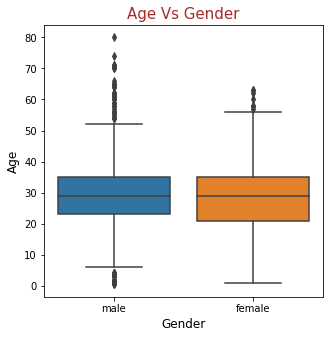

In [28]:
plt.figure(figsize = (5,5))
sns.boxplot(x = data['Sex'], y= data['Age'])
plt.xlabel("Gender", fontsize = 12)
plt.ylabel("Age",fontsize = 12)
plt.title("Age Vs Gender", fontsize = 15, color = 'brown');

##### Comment
We can see many male passengers aged between 50-80 and few female travellers aged between 55-65

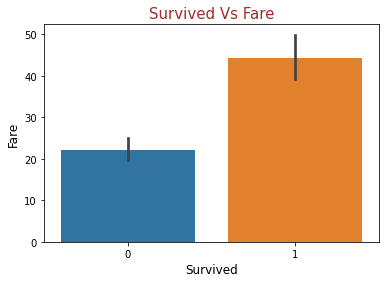

In [29]:
sns.barplot(x = 'Survived', y = 'Fare', data=data)
plt.xlabel("Survived", fontsize = 12)
plt.ylabel("Fare",fontsize = 12)
plt.title("Survived Vs Fare", fontsize = 15, color = 'brown');

###### Comment:
Passengers who survived paid almost double the fare when compared to the ones who did not survive

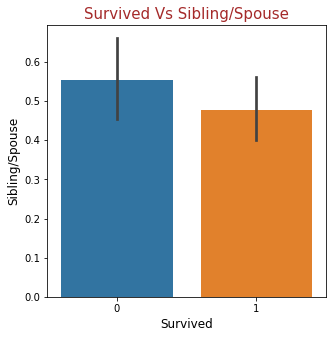

In [30]:
plt.figure(figsize = (5,5))
sns.barplot(x = 'Survived', y = 'SibSp', data=data,)
plt.xlabel("Survived", fontsize = 12)
plt.ylabel("Sibling/Spouse",fontsize = 12)
plt.title("Survived Vs Sibling/Spouse", fontsize = 15,  color = 'brown')
plt.show()

###### Comment
Most passengers who did not survive had more siblings/spouses

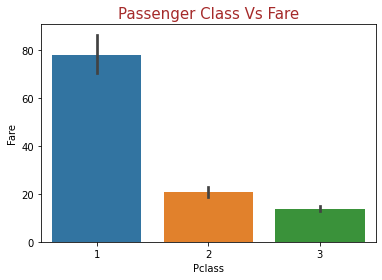

In [31]:
sns.barplot(y = 'Fare', x = 'Pclass', data=data)
plt.title('Passenger Class Vs Fare', fontsize = 15,  color = 'brown')
plt.show()

###### Comment:
The Fare on the **Passenger Class 1** is the highest

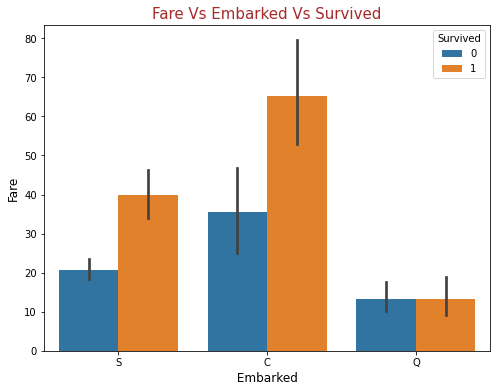

In [32]:
plt.figure(figsize = (8,6))
sns.barplot(x = data['Embarked'],  y = data['Fare'], hue = data['Survived'])
plt.xlabel(" Embarked ", fontsize = 12)
plt.ylabel("Fare",fontsize = 12)
plt.title("Fare Vs Embarked Vs Survived", fontsize = 15,  color = 'brown')
plt.show()

###### Comment:
 - Passengers who boarded the ship from Queenstown paid same lowest Fare and survival chances were equal too
 - Passengers who boarded the ship from Southampton and Cherbourg and paid more Fare were the ones who survived the most

### Multivariate Analysis

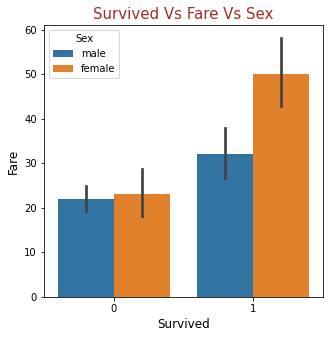

In [33]:
plt.figure(figsize = (5,5))
sns.barplot(x = 'Survived', y = 'Fare', data=data, hue = 'Sex')
plt.xlabel("Survived", fontsize = 12)
plt.ylabel("Fare",fontsize = 12)
plt.title("Survived Vs Fare Vs Sex", fontsize = 15,  color = 'brown');

###### Comment
Passengers who were female and survive paid the higher fares

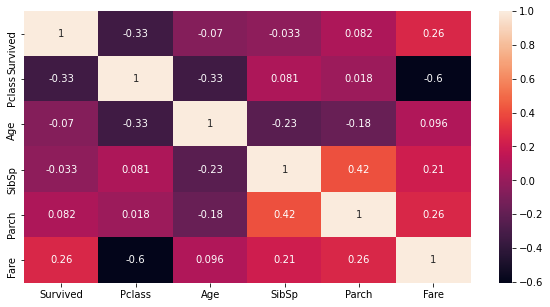

In [34]:
plt.figure(figsize = (10,5))
sns.heatmap(data.corr(), annot=True);

###### Comment:
- Highest negative correation between Fare and PClass
- Highest positive correlation between Sex and survived
- Both the correlations are between 50-60% which is not too high


### Data Preparation

In [35]:
# Creating binary values for Sex
data['Sex'] = data['Sex'].map({'male':0, 'female':1})

In [36]:
# Creating dummies for Embarked 
EM = pd.get_dummies(data['Embarked'], drop_first = True, prefix = 'Embarked')

In [37]:
df = pd.concat([data,EM], axis=1)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_Q,Embarked_S
0,0,3,0,22.0,1,0,7.2500,S,0,1
1,1,1,1,38.0,1,0,71.2833,C,0,0
2,1,3,1,26.0,0,0,7.9250,S,0,1
3,1,1,1,35.0,1,0,53.1000,S,0,1
4,0,3,0,35.0,0,0,8.0500,S,0,1


In [38]:
# Creating dummies for Embarked 
PC = pd.get_dummies(data['Pclass'], drop_first = True, prefix = 'Passenger Class')

In [39]:
df1 = pd.concat([df,PC], axis=1)
df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_Q,Embarked_S,Passenger Class_2,Passenger Class_3
0,0,3,0,22.0,1,0,7.2500,S,0,1,0,1
1,1,1,1,38.0,1,0,71.2833,C,0,0,0,0
2,1,3,1,26.0,0,0,7.9250,S,0,1,0,1
3,1,1,1,35.0,1,0,53.1000,S,0,1,0,0
4,0,3,0,35.0,0,0,8.0500,S,0,1,0,1


In [40]:
# Dropping the Repeated Variable Embarked,Passenger Class
new_df = df1.drop(['Embarked','Pclass'], axis = 1)
new_df.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Passenger Class_2,Passenger Class_3
0,0,0,22.0,1,0,7.2500,0,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0,0
2,1,1,26.0,0,0,7.9250,0,1,0,1
3,1,1,35.0,1,0,53.1000,0,1,0,0
4,0,0,35.0,0,0,8.0500,0,1,0,1


In [41]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 888 entries, 0 to 890
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Survived           888 non-null    int64  
 1   Sex                888 non-null    int64  
 2   Age                888 non-null    float64
 3   SibSp              888 non-null    int64  
 4   Parch              888 non-null    int64  
 5   Fare               888 non-null    float64
 6   Embarked_Q         888 non-null    uint8  
 7   Embarked_S         888 non-null    uint8  
 8   Passenger Class_2  888 non-null    uint8  
 9   Passenger Class_3  888 non-null    uint8  
dtypes: float64(2), int64(4), uint8(4)
memory usage: 92.0 KB


##### Comment:
 - All the variables are in numeric form
 - Lets go ahead split the data set into X and Y and then build Logistic Regression Model

In [42]:
# X and y split
X_train = new_df.drop(['Survived'], axis = 1)
y_train = new_df['Survived']

In [43]:
X_train.head()

,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Passenger Class_2,Passenger Class_3
0,0,22.0,1,0,7.2500,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,1
3,1,35.0,1,0,53.1000,0,1,0,0
4,0,35.0,0,0,8.0500,0,1,0,1


In [44]:
y_train.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

#### Feature Scaling

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()

X_train[['Age','Fare']] = scaler.fit_transform(X_train[['Age','Fare']])
X_train.head()                                                     

,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Passenger Class_2,Passenger Class_3
0,0,-0.579375,1,0,-0.566959,0,1,0,1
1,1,0.649949,1,0,0.989016,0,0,0,0
2,1,-0.272044,0,0,-0.550557,0,1,0,1
3,1,0.419451,1,0,0.547171,0,1,0,0
4,0,0.419451,0,0,-0.547519,0,1,0,1


In [47]:
# Checking survival rate
survival_rate = (sum(new_df['Survived'])/len(new_df['Survived']))*100
survival_rate

38.17567567567568

### Build a Model
##### Using Logistic Regression

In [48]:
import statsmodels.api as sm

In [49]:
logreg = sm.GLM(y_train,(sm.add_constant(X_train)),  family = sm.families.Binomial())
logreg.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  888
Model:                            GLM   Df Residuals:                      878
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -391.45
Date:                Mon, 05 Jul 2021   Deviance:                       782.89
Time:                        22:32:53   Pearson chi2:                     908.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3532      0.273      1.296      0.195      -0.181       0.887
Sex                   2.7308      0.201     13.573      0.000       2.336       3.125
Age                  -0.5106      0.102     -4.984      0.000      -0.711      -0.310
SibSp                -0.3051      0.110     -2.772      0.006      -0.521      -0.089
Parch                -0.0745      0.120     -0.619      0.536      -0.310       0.161
Fare                 -0.0039      0.133     -0.029      0.977      -0.264       0.256
Embarked_Q           -0.0359      0.382     -0.094      0.925      -0.785       0.713
Embarked_S           -0.4389      0.239     -1.833      0.067      -0.908       0.030
Passenger Class_2    -1.0305      0.312     -3.305      0.001      -1.642      -0.419
Passenger Class_3    -2.2840      0.320     -7.132      0.000      -2.912      -1.656
=====================================================================================
"""

###### Comment
Embarked_Q and Fare have high p-values. First we'll drop Fare

In [50]:
X_train.drop(['Fare'], axis = 1, inplace=True)

In [51]:
# Model 2
logreg2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logreg2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  888
Model:                            GLM   Df Residuals:                      879
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -391.45
Date:                Mon, 05 Jul 2021   Deviance:                       782.89
Time:                        22:32:53   Pearson chi2:                     908.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3496      0.243      1.437      0.151      -0.127       0.827
Sex                   2.7303      0.201     13.606      0.000       2.337       3.124
Age                  -0.5103      0.102     -4.996      0.000      -0.711      -0.310
SibSp                -0.3057      0.108     -2.828      0.005      -0.518      -0.094
Parch                -0.0754      0.116     -0.649      0.516      -0.303       0.152
Embarked_Q           -0.0354      0.382     -0.093      0.926      -0.784       0.713
Embarked_S           -0.4380      0.238     -1.842      0.065      -0.904       0.028
Passenger Class_2    -1.0259      0.270     -3.798      0.000      -1.555      -0.497
Passenger Class_3    -2.2783      0.255     -8.948      0.000      -2.777      -1.779
=====================================================================================
"""

###### Comment:
Embarked_Q has very high P-value. Will drop this variable

In [52]:
X_train.drop(['Embarked_Q'], axis = 1, inplace=True)

In [53]:
# Model3
logreg3 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logreg3.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  888
Model:                            GLM   Df Residuals:                      880
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -391.45
Date:                Mon, 05 Jul 2021   Deviance:                       782.90
Time:                        22:32:53   Pearson chi2:                     908.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3427      0.232      1.480      0.139      -0.111       0.796
Sex                   2.7283      0.199     13.681      0.000       2.337       3.119
Age                  -0.5110      0.102     -5.014      0.000      -0.711      -0.311
SibSp                -0.3056      0.108     -2.829      0.005      -0.517      -0.094
Parch                -0.0743      0.116     -0.643      0.520      -0.301       0.152
Embarked_S           -0.4269      0.205     -2.079      0.038      -0.829      -0.024
Passenger Class_2    -1.0291      0.268     -3.841      0.000      -1.554      -0.504
Passenger Class_3    -2.2849      0.245     -9.345      0.000      -2.764      -1.806
=====================================================================================
"""

###### Comment:

Parch has high p-value. Will drop this variable and build model again

In [54]:
X_train.drop(['Parch'], axis = 1, inplace=True)

In [55]:
logreg4 = sm.GLM(y_train,(sm.add_constant(X_train)),family = sm.families.Binomial())
res = logreg4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  888
Model:                            GLM   Df Residuals:                      881
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -391.66
Date:                Mon, 05 Jul 2021   Deviance:                       783.32
Time:                        22:32:54   Pearson chi2:                     912.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3356      0.231      1.452      0.146      -0.117       0.789
Sex                   2.7015      0.195     13.886      0.000       2.320       3.083
Age                  -0.5071      0.102     -4.991      0.000      -0.706      -0.308
SibSp                -0.3264      0.104     -3.148      0.002      -0.530      -0.123
Embarked_S           -0.4327      0.205     -2.111      0.035      -0.835      -0.031
Passenger Class_2    -1.0262      0.268     -3.830      0.000      -1.551      -0.501
Passenger Class_3    -2.2832      0.245     -9.335      0.000      -2.763      -1.804
=====================================================================================
"""

###### Comment:

Pvalues are within acceptable range. Will now check VIF values

#### Checking VIFs

In [56]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF']  = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,Embarked_S,2.85
5,Passenger Class_3,2.27
4,Passenger Class_2,1.68
0,Sex,1.37
2,SibSp,1.31
1,Age,1.11


In [58]:
# Getting prediction on the train set
y_train_pred = res.predict(sm.add_constant(X_train))

In [59]:
y_train_pred = y_train_pred.values.reshape(-1)

##### Creating dataframe with actual survived vs the predicted probabilities

In [60]:
y_train_pred_final = pd.DataFrame({'Survived':y_train.values,'Survived_prob':y_train_pred})
y_train_pred_final['Passenger_ID'] = y_train.index
y_train_pred_final.head()

,Survived,Survived_prob,Passenger_ID
0,0,0.082191,0
1,1,0.915377,1
2,1,0.612801,2
3,1,0.887484,3
4,0,0.069587,4


##### Creating a columns predicted with 1 if survived prob is >0.5 else 0

In [61]:
y_train_pred_final['Predicted'] = y_train_pred_final.Survived_prob.map(lambda x:1 if x> 0.5 else 0)
y_train_pred_final.head()

,Survived,Survived_prob,Passenger_ID,Predicted
0,0,0.082191,0,0
1,1,0.915377,1,1
2,1,0.612801,2,1
3,1,0.887484,3,1
4,0,0.069587,4,0


In [62]:
from sklearn import metrics

In [63]:
confusion = metrics.confusion_matrix(y_train_pred_final.Survived,y_train_pred_final.Predicted)
print(confusion)

[[474  75]
 [101 238]]


In [64]:
# Predicted  deceased  survived
# actual            
# deceased    474       75
# survived    101       238

In [65]:
# Checking the accuracy
print(metrics.accuracy_score(y_train_pred_final.Survived,y_train_pred_final.Predicted))

0.8018018018018018


##### Metrics beyond accuracy

In [66]:
TP = confusion[1,1]
TN = confusion[0,0]
FP = confusion[0,1]
FN = confusion[1,0]

In [67]:
# Sensitivity of our logisitic Model
TP/float(TP+FN)

0.7020648967551623

In [68]:
# Specificity
TN/float(TN+FP)

0.8633879781420765

In [69]:
# positive predictive value 
print (TP / float(TP+FP))

0.7603833865814696


In [70]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8243478260869566


### ROC curve

In [71]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [72]:
fpr,tpr,thresholds = metrics.roc_curve(y_train_pred_final.Survived,y_train_pred_final.Survived_prob, drop_intermediate=False)

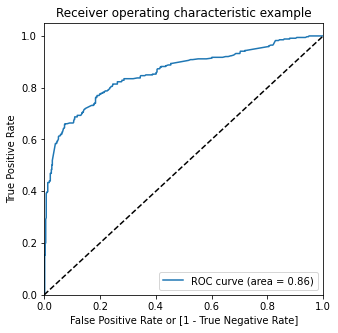

In [73]:
draw_roc(y_train_pred_final.Survived, y_train_pred_final.Survived_prob)

### Finding the optimal cut-off

Optimal cutoff probability is that probability where we get balanced sensitivity and specificity

In [74]:
numbers = [float(x/10) for x in range(10)]
for i in numbers:
    y_train_pred_final[i] = y_train_pred_final.Survived_prob.map(lambda x:1 if x>i else 0)
y_train_pred_final.head()

,Survived,Survived_prob,Passenger_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.082191,0,0,1,0,0,0,0,0,0,0,0,0
1,1,0.915377,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.612801,2,1,1,1,1,1,1,1,1,0,0,0
3,1,0.887484,3,1,1,1,1,1,1,1,1,1,1,0
4,0,0.069587,4,0,1,0,0,0,0,0,0,0,0,0


In [75]:
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Survived,y_train_pred_final[i])
    total = sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,1]+cm1[1,0])
    cutoff_df.loc[i] = [i,accuracy,sensi,speci]
print(cutoff_df)    

     prob  accuracy     sensi     speci
0.0   0.0  0.381757  1.000000  0.000000
0.1   0.1  0.561937  0.920354  0.340619
0.2   0.2  0.707207  0.849558  0.619308
0.3   0.3  0.769144  0.823009  0.735883
0.4   0.4  0.793919  0.764012  0.812386
0.5   0.5  0.801802  0.702065  0.863388
0.6   0.6  0.823198  0.657817  0.925319
0.7   0.7  0.792793  0.504425  0.970856
0.8   0.8  0.762387  0.395280  0.989071
0.9   0.9  0.693694  0.206490  0.994536


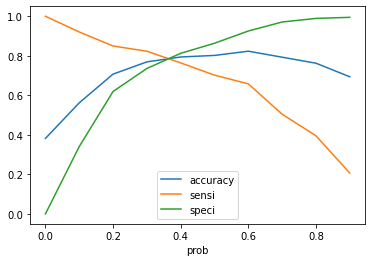

In [76]:
cutoff_df.plot.line(x = 'prob', y = ['accuracy','sensi','speci'])
plt.show()

###### From the curve above , 0.35 is the optimum cutiff

In [77]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Survived_prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_final.head()

,Survived,Survived_prob,Passenger_ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.082191,0,0,1,0,0,0,0,0,0,0,0,0,0
1,1,0.915377,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,0.612801,2,1,1,1,1,1,1,1,1,0,0,0,1
3,1,0.887484,3,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.069587,4,0,1,0,0,0,0,0,0,0,0,0,0


In [78]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Survived, y_train_pred_final.final_predicted)

0.7871621621621622

In [79]:
# Confusion matrix
confusion2 = metrics.confusion_matrix(y_train_pred_final.Survived,y_train_pred_final.final_predicted)
confusion2

array([[434, 115],
       [ 74, 265]], dtype=int64)

In [80]:
TP = confusion2[1,1]
TN = confusion2[0,0]
FP = confusion2[0,1]
FN = confusion2[1,0]

In [81]:
# Sensitivity
TP/float(TP+FN)

0.7817109144542773

In [82]:
# Specificity
TN/float(TN+FP)

0.7905282331511839

In [83]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6973684210526315


In [84]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8543307086614174


### Precision and recall tradeoff

In [85]:
from sklearn.metrics import precision_recall_curve

In [86]:
y_train_pred_final.Survived, y_train_pred_final.final_predicted

(0      0
 1      1
 2      1
 3      1
 4      0
       ..
 883    0
 884    1
 885    0
 886    1
 887    0
 Name: Survived, Length: 888, dtype: int64,
 0      0
 1      1
 2      1
 3      1
 4      0
       ..
 883    0
 884    1
 885    1
 886    1
 887    0
 Name: final_predicted, Length: 888, dtype: int64)

In [87]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Survived, y_train_pred_final.Survived_prob)

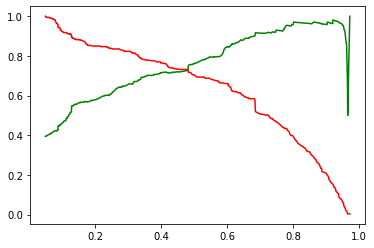

In [88]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

In [90]:
test_df = pd.read_csv("tested.csv")
test_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Data Cleaning and Data preparation

In [91]:
# Dropping the insignificant variables
test_df.drop(['Cabin','Name','Ticket'], axis = 1, inplace=True)
test_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.5,0,0,7.8292,Q
1,893,1,3,female,47.0,1,0,7.0000,S
2,894,0,2,male,62.0,0,0,9.6875,Q
3,895,0,3,male,27.0,0,0,8.6625,S
4,896,1,3,female,22.0,1,1,12.2875,S


In [92]:
test_df.shape

(418, 9)

In [93]:

test_df.isnull().sum()

PassengerId     0
Survived        0
Pclass          0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

In [94]:
test_df.Fare.median()

14.4542

<AxesSubplot:xlabel='Fare', ylabel='Density'>

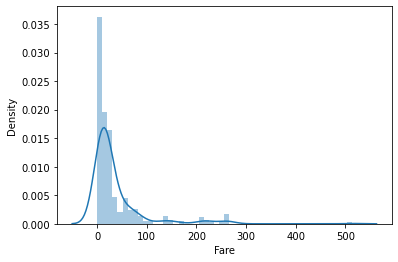

In [95]:
sns.distplot(test_df.Fare)

In [96]:
test_df.Fare.fillna(14.45, inplace=True) # fill with median of the column as the data is skewed

<AxesSubplot:xlabel='Age', ylabel='Density'>

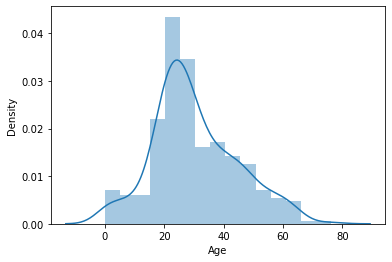

In [97]:
sns.distplot(test_df.Age)

In [98]:
test_df.Age.mean()

30.272590361445783

In [99]:
test_df.Age.fillna(30,inplace=True)

In [100]:
test_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [101]:
test_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.216507,0.447368,0.392344,35.576525
std,120.810458,0.481622,0.841838,12.635016,0.896760,0.981429,55.850107
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.471875
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


The column Fare has outliers, Let's cap the outlier

<AxesSubplot:xlabel='Fare'>

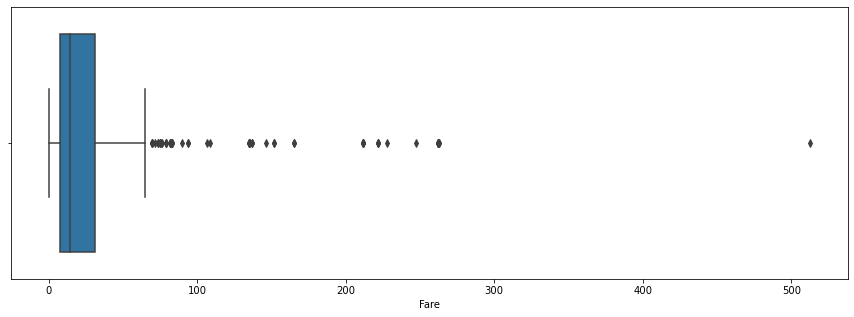

In [102]:
plt.figure(figsize = (15,5))
sns.boxplot(test_df.Fare)

In [103]:
# Capping the outlier at 100th percentile
test_df.Fare.quantile(1)

512.3292

In [104]:
test_df = test_df[test_df.Fare != 512.3292]

In [105]:
test_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,417.000000,417.000000,417.000000,417.00000,417.000000,417.000000,417.000000
mean,1100.177458,0.362110,2.268585,30.14988,0.448441,0.390887,34.433234
std,120.775249,0.481188,0.840556,12.57646,0.897568,0.982155,50.784295
min,892.000000,0.000000,1.000000,0.17000,0.000000,0.000000,0.000000
25%,996.000000,0.000000,1.000000,23.00000,0.000000,0.000000,7.895800
50%,1100.000000,0.000000,3.000000,30.00000,0.000000,0.000000,14.454200
75%,1204.000000,1.000000,3.000000,35.00000,1.000000,0.000000,31.387500
max,1309.000000,1.000000,3.000000,76.00000,8.000000,9.000000,263.000000


In [106]:
# Creating binary values for Sex
test_df['Sex'] = test_df['Sex'].map({'male':0, 'female':1})

In [107]:
# Creating dummies for Embarked 
EM_test = pd.get_dummies(test_df['Embarked'], drop_first = True, prefix = 'Embarked')

In [108]:
test_df = pd.concat([test_df,EM_test], axis=1)
test_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_Q,Embarked_S
0,892,0,3,0,34.5,0,0,7.8292,Q,1,0
1,893,1,3,1,47.0,1,0,7.0000,S,0,1
2,894,0,2,0,62.0,0,0,9.6875,Q,1,0
3,895,0,3,0,27.0,0,0,8.6625,S,0,1
4,896,1,3,1,22.0,1,1,12.2875,S,0,1


In [109]:
# Creating dummies for Embarked 
PC_test = pd.get_dummies(test_df['Pclass'], drop_first = True, prefix = 'Passenger Class')

In [110]:
df_test = pd.concat([test_df,PC_test], axis=1)
df_test.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_Q,Embarked_S,Passenger Class_2,Passenger Class_3
0,892,0,3,0,34.5,0,0,7.8292,Q,1,0,0,1
1,893,1,3,1,47.0,1,0,7.0000,S,0,1,0,1
2,894,0,2,0,62.0,0,0,9.6875,Q,1,0,1,0
3,895,0,3,0,27.0,0,0,8.6625,S,0,1,0,1
4,896,1,3,1,22.0,1,1,12.2875,S,0,1,0,1


In [111]:
# Dropping the Repeated Variable Embarked
df_test1 = df_test.drop(['Embarked','Pclass'], axis = 1)
df_test1.head()

,PassengerId,Survived,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Passenger Class_2,Passenger Class_3
0,892,0,0,34.5,0,0,7.8292,1,0,0,1
1,893,1,1,47.0,1,0,7.0000,0,1,0,1
2,894,0,0,62.0,0,0,9.6875,1,0,1,0
3,895,0,0,27.0,0,0,8.6625,0,1,0,1
4,896,1,1,22.0,1,1,12.2875,0,1,0,1


In [112]:
df_test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PassengerId        417 non-null    int64  
 1   Survived           417 non-null    int64  
 2   Sex                417 non-null    int64  
 3   Age                417 non-null    float64
 4   SibSp              417 non-null    int64  
 5   Parch              417 non-null    int64  
 6   Fare               417 non-null    float64
 7   Embarked_Q         417 non-null    uint8  
 8   Embarked_S         417 non-null    uint8  
 9   Passenger Class_2  417 non-null    uint8  
 10  Passenger Class_3  417 non-null    uint8  
dtypes: float64(2), int64(5), uint8(4)
memory usage: 27.7 KB


In [113]:
col = ['Survived','PassengerId']
# X and y split
X_test = df_test1.drop(col, axis = 1)
y_test = df_test1[col]

In [114]:
X_test[['Age','Fare']] = scaler.transform(X_test[['Age','Fare']])
X_test.head()                                                     

,Sex,Age,SibSp,Parch,Fare,Embarked_Q,Embarked_S,Passenger Class_2,Passenger Class_3
0,0,0.381034,0,0,-0.552885,1,0,0,1
1,1,1.341444,1,0,-0.573034,0,1,0,1
2,0,2.493936,0,0,-0.507729,1,0,1,0
3,0,-0.195211,0,0,-0.532636,0,1,0,1
4,1,-0.579375,1,1,-0.444550,0,1,0,1


In [115]:
col = ['Sex', 'Age','SibSp','Embarked_S','Passenger Class_2', 'Passenger Class_3']
X_test = X_test[col]

##### Making predictions on the test set

In [116]:
y_test_pred = res.predict(sm.add_constant(X_test))

In [117]:
y_test_df = pd.DataFrame(y_test_pred)
y_test_df['PassengerId'] = y_test['PassengerId']
y_test_df['Survived'] = y_test['Survived']
y_pred_final = y_test_df.rename(columns = {0:'Survived_Prob'})

In [118]:
y_pred_final.head()

,Survived_Prob,PassengerId,Survived
0,0.105188,892,0
1,0.335047,893,1
2,0.123976,894,0
3,0.092677,895,0
4,0.571646,896,1


In [119]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['PassengerId','Survived','Survived_Prob'], axis=1)

In [120]:
y_pred_final['final_predicted'] = y_pred_final.Survived_Prob.map(lambda x: 1 if x > 0.45 else 0)

In [121]:
y_pred_final.head()

,PassengerId,Survived,Survived_Prob,final_predicted
0,892,0,0.105188,0
1,893,1,0.335047,0
2,894,0,0.123976,0
3,895,0,0.092677,0
4,896,1,0.571646,1


In [122]:
# Accuracy
metrics.accuracy_score(y_pred_final.Survived,y_pred_final.final_predicted)

0.935251798561151

In [123]:
confusion2 = metrics.confusion_matrix(y_pred_final.Survived, y_pred_final.final_predicted)
confusion2

array([[244,  22],
       [  5, 146]], dtype=int64)

In [124]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [125]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.9668874172185431

In [126]:
# Let us calculate specificity
TN / float(TN+FP)

0.9172932330827067

### Final Results:
- Accuracy - 93%
- Sensitivity - 96%
- Specificity - 91% 